In [1]:
!pip install numpy matplotlib

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# Define the cities (nodes) and their coordinates
cities = {
    0: (60, 200),
    1: (180, 200),
    2: (80, 180),
    3: (140, 180),
    4: (20, 160),
    5: (100, 160),
    6: (200, 160),
    7: (140, 140),
    8: (40, 120),
    9: (100, 120),
    10: (180, 100),
    11: (60, 80),
    12: (120, 80),
    13: (180, 60),
    14: (20, 40),
    15: (100, 40),
    16: (200, 40),
    17: (20, 20),
    18: (60, 20),
    19: (160, 20)
}

num_cities = len(cities)

In [4]:
# Compute distance matrix between cities
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distances[i][j] = np.linalg.norm(np.array(cities[i]) - np.array(cities[j]))

In [5]:
# Parameters for the ACO algorithm
num_ants = 20
num_iterations = 100
evaporation_rate = 0.5
alpha = 1.0  # Importance of pheromone
beta = 2.0   # Importance of visibility (distance)

# Initialize pheromone levels
pheromone = np.ones((num_cities, num_cities))

In [6]:
# ACO function to solve TSP
def ant_colony_optimization():
    global pheromone  # Declare pheromone as global variable
    
    shortest_distance = float('inf')
    best_path = []
    
    for iteration in range(num_iterations):
        paths = []
        path_lengths = []
        
        # Generate paths for each ant
        for ant in range(num_ants):
            visited = set()
            current_city = random.randint(0, num_cities - 1)
            visited.add(current_city)
            path = [current_city]
            path_length = 0
            
            while len(visited) < num_cities:
                # Calculate probabilities for next city based on pheromone and distance
                unvisited_cities = [city for city in range(num_cities) if city not in visited]
                probabilities = []
                
                for city in unvisited_cities:
                    pheromone_value = pheromone[current_city][city]
                    distance_value = distances[current_city][city]
                    probabilities.append((city, pheromone_value**alpha / distance_value**beta))
                
                probabilities = sorted(probabilities, key=lambda x: x[1], reverse=True)
                
                # Choose next city using roulette wheel selection
                selected_city = None
                rand = random.uniform(0, sum(p[1] for p in probabilities))
                cumulative_prob = 0
                
                for city, prob in probabilities:
                    cumulative_prob += prob
                    if cumulative_prob >= rand:
                        selected_city = city
                        break
                
                path.append(selected_city)
                visited.add(selected_city)
                path_length += distances[current_city][selected_city]
                current_city = selected_city
            
            # Complete the tour by returning to the starting city
            path_length += distances[path[-1]][path[0]]
            paths.append(path)
            path_lengths.append(path_length)
            
            # Update the global best path
            if path_length < shortest_distance:
                shortest_distance = path_length
                best_path = path
        
        # Update pheromone levels
        pheromone *= (1 - evaporation_rate)  # Evaporation
        for path, length in zip(paths, path_lengths):
            for i in range(num_cities):
                j = (i + 1) % num_cities
                pheromone[path[i]][path[j]] += 1.0 / length
        
        # Optionally, print the progress
        print(f"Iteration {iteration + 1}: Shortest distance = {shortest_distance}")
    
    return best_path, shortest_distance

In [7]:
# Run the ACO algorithm
best_path, shortest_distance = ant_colony_optimization()

# Print the best path and the shortest distance found
print("Best path:", best_path)
print("Shortest distance:", shortest_distance)

Iteration 1: Shortest distance = 1327.1803853770211
Iteration 2: Shortest distance = 1267.1459003139198
Iteration 3: Shortest distance = 1241.479566653521
Iteration 4: Shortest distance = 1149.0068305100217
Iteration 5: Shortest distance = 1149.0068305100217
Iteration 6: Shortest distance = 1111.8850721085328
Iteration 7: Shortest distance = 1111.8850721085328
Iteration 8: Shortest distance = 1111.8850721085328
Iteration 9: Shortest distance = 1111.8850721085328
Iteration 10: Shortest distance = 1111.8850721085328
Iteration 11: Shortest distance = 1111.8850721085328
Iteration 12: Shortest distance = 984.2075326973828
Iteration 13: Shortest distance = 984.2075326973828
Iteration 14: Shortest distance = 984.2075326973828
Iteration 15: Shortest distance = 978.37161134737
Iteration 16: Shortest distance = 942.7564654641621
Iteration 17: Shortest distance = 894.3629070482145
Iteration 18: Shortest distance = 894.3629070482145
Iteration 19: Shortest distance = 871.117353844847
Iteration 20: 

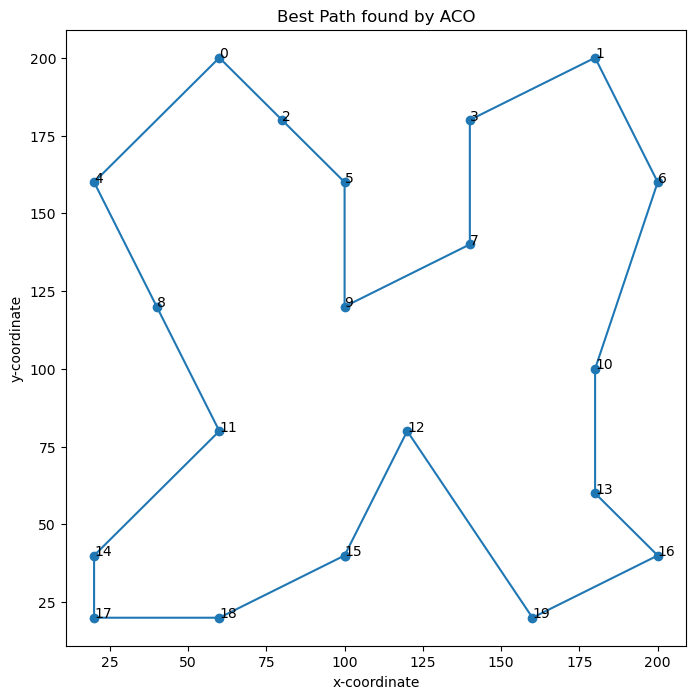

In [8]:
# Plotting the best path
def plot_path(path):
    x_vals = [cities[i][0] for i in path + [path[0]]]
    y_vals = [cities[i][1] for i in path + [path[0]]]
    plt.figure(figsize=(8, 8))
    plt.plot(x_vals, y_vals, 'o-')
    for city in cities:
        plt.text(cities[city][0], cities[city][1], str(city))
    plt.title("Best Path found by ACO")
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.show()

plot_path(best_path)